<a href="https://colab.research.google.com/github/ambarwati96/telco_churn_project/blob/main/Project_Telco_Churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Dataset**



In [ ]:
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly

In [10]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/ambarwati96/telco_churn_project/main/Telco-Customer-Churn-dataset.csv')
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'].replace(" ", '0'))

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Checking the data type and non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking the statistic of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
# data duplicate checking
data.duplicated().sum()

0

In [ ]:
# show the unique values in each column

def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Jumlah data Unique values dan koresponden untuk Field / feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category_unique_value()

Jumlah data Unique values dan koresponden untuk Field / feature: customerID
------------------------------------------------------------------------------------------
            Count  Percentage
9548-LIGTA      1    0.014198
6849-WLEYG      1    0.014198
4581-LNWUM      1    0.014198
5673-TIYIB      1    0.014198
6242-SGYTS      1    0.014198
...           ...         ...
0795-XCCTE      1    0.014198
1272-ILHFG      1    0.014198
1085-LDWAM      1    0.014198
5394-MEITZ      1    0.014198
6906-MPARY      1    0.014198

[7043 rows x 2 columns]
------------------------------------------------------------------------------------------
Jumlah data Unique values dan koresponden untuk Field / feature: gender
------------------------------------------------------------------------------------------
        Count  Percentage
Male     3555    50.47565
Female   3488    49.52435
------------------------------------------------------------------------------------------
Jumlah data Unique values

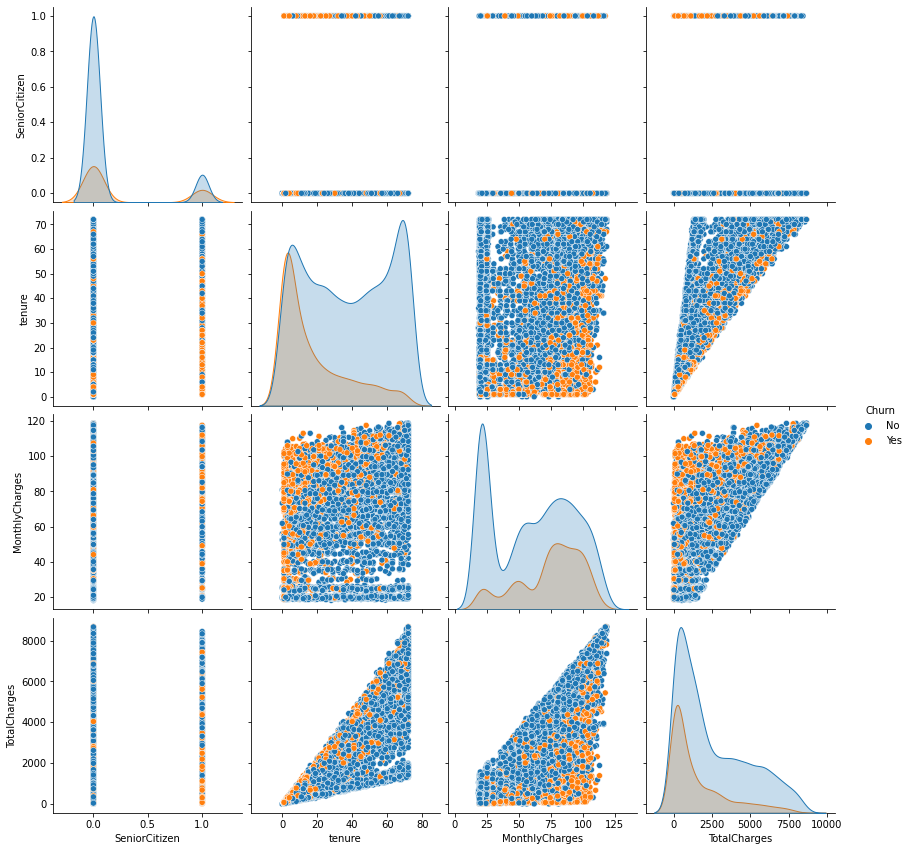

In [ ]:
#show the correlation of numerical columns
import seaborn as sns

sns.pairplot(data, hue='Churn', height=3)
plt.show()

#**Exploratory Data Analysis**

,Churn
No,5174
Yes,1869


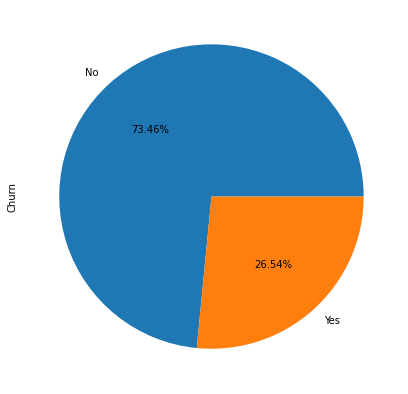

In [ ]:
#Show the percentage of churn and non-churn data
churn = pd.DataFrame(data['Churn'].value_counts())
churn['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
churn

##Analysis of Gender Column

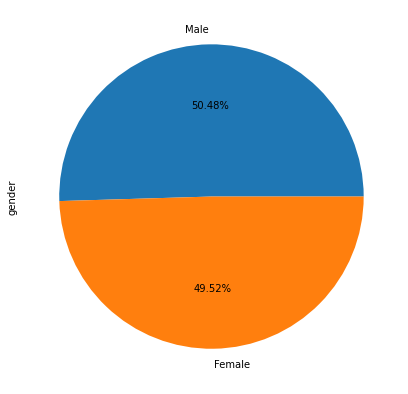

In [ ]:
#Proportion of Gender
gender = pd.DataFrame(data['gender'].value_counts())
gender['gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')


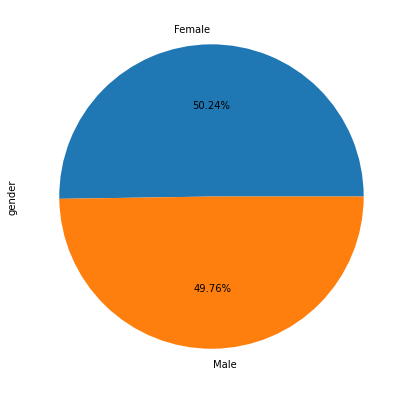

In [ ]:
#Churn analysis based on gender
gender_c = pd.DataFrame(data[data['Churn'] == 'Yes']['gender'].value_counts())
gender_c['gender'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')


##Analysis of Senior Citizen Column

,SeniorCitizen
0,5901
1,1142


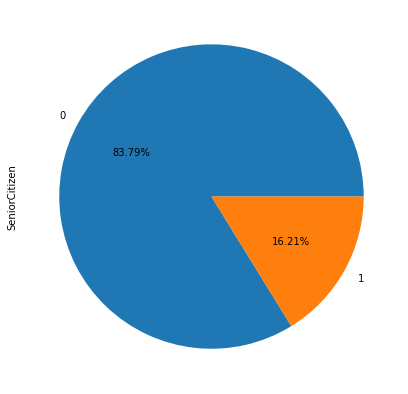

In [ ]:
#Proportion of Senior Citizen
Snr = pd.DataFrame(data['SeniorCitizen'].value_counts())
Snr
Snr['SeniorCitizen'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
Snr

,Churn
No,666
Yes,476


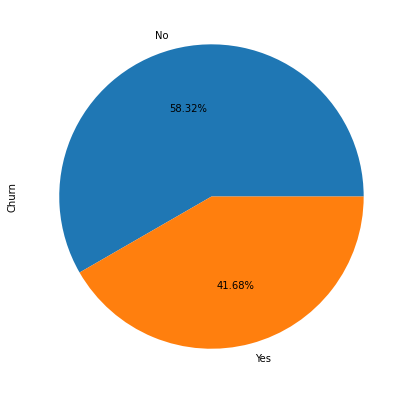

In [ ]:
#Churn analysis based on senior citizen column
Snr_Chruned = pd.DataFrame(data[data['SeniorCitizen'] == 1]['Churn'].value_counts())
Snr_Chruned['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
Snr_Chruned

,Churn
No,4508
Yes,1393


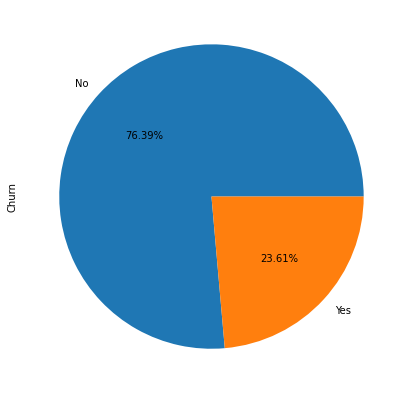

In [ ]:
#Churn analysis based on senior citizen column
NoSnr_Chruned = pd.DataFrame(data[data['SeniorCitizen'] == 0]['Churn'].value_counts())
NoSnr_Chruned['Churn'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')
NoSnr_Chruned

## Analysis of  Partner, Dependents, PhoneService, and PaperlessBilling Columns

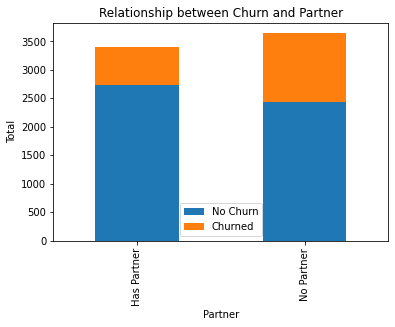

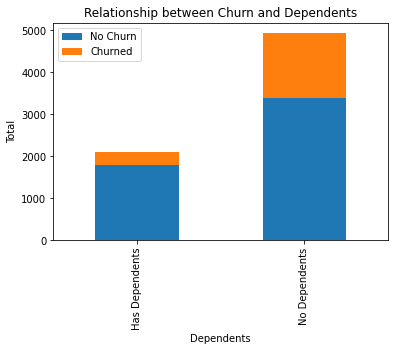

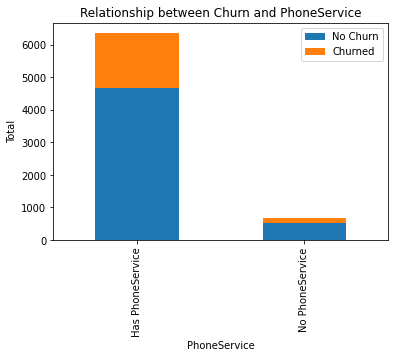

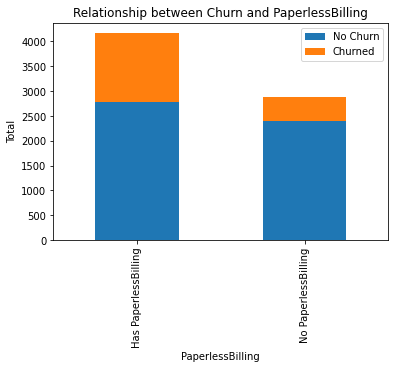

In [ ]:
#Columns that have 'Yes' or 'No'
list_columns = ['Partner', 'Dependents','PhoneService','PaperlessBilling']

for i in range(len(list_columns)):
  data_vis1 = data.loc[(data[list_columns[i]] == 'Yes')]
  df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
  df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Has '+list_columns[i]})

  data_vis2 = data.loc[(data[list_columns[i]] == 'No')]
  df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
  df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No '+list_columns[i]})

  joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
  joined_df = joined_df.reset_index()
  joined_df = joined_df.rename(columns = {'index':'Churn'})

  trans = joined_df.T.reset_index()
  trans = trans.rename(columns = {'index':list_columns[i], 0:'No Churn', 1:'Churned'})
  trans = trans.drop(index = 0, axis = 0)

  trans.plot(x=list_columns[i], kind='bar', stacked=True, ylabel = 'Total',
        title='Relationship between Churn and '+list_columns[i])

  i+=1

##Analysis of Online Security, Online Backup, Device Protection, TechSupport, Streaming TV, Streaming Movies Columns

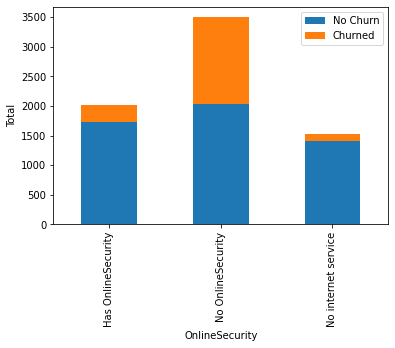

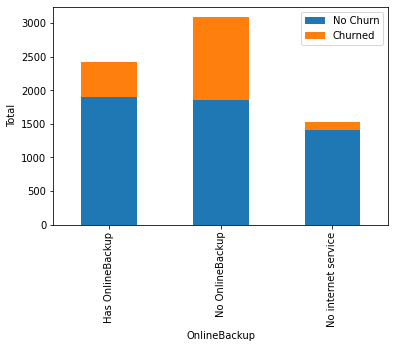

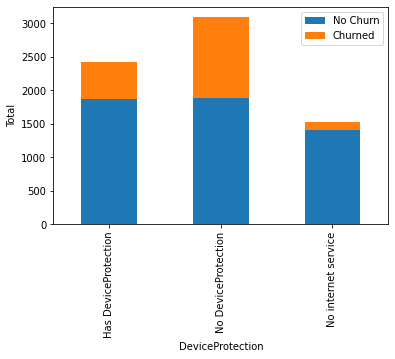

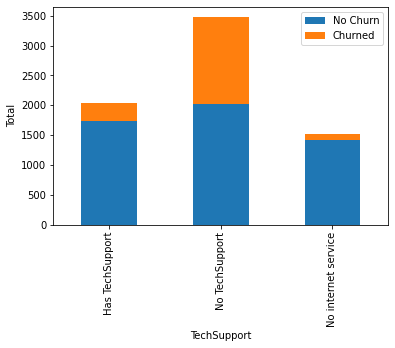

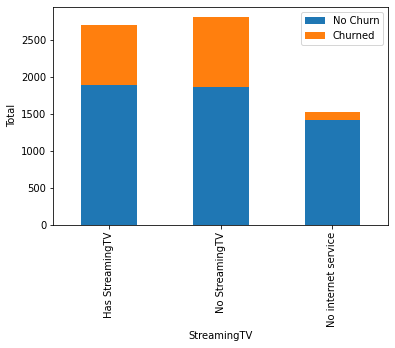

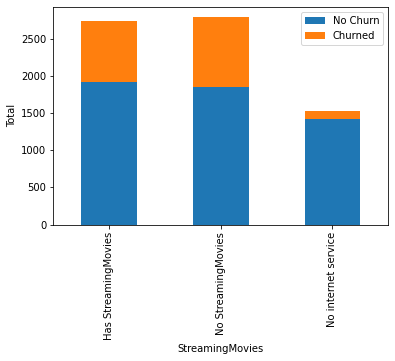

In [ ]:
#Columns that have 'Yes', 'No', 'No internet service'
list_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

for i in range(len(list_columns)):
  data_vis1 = data.loc[(data[list_columns[i]] == 'Yes')]
  df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
  df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Has '+list_columns[i]})

  data_vis2 = data.loc[(data[list_columns[i]] == 'No')]
  df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
  df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No '+list_columns[i]})

  data_vis3 = data.loc[(data[list_columns[i]] == 'No internet service')]
  df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
  df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No internet service'})

  joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
  joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
  joined_df2 = joined_df2.reset_index()
  joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

  trans = joined_df2.T.reset_index()
  trans = trans.rename(columns = {'index':list_columns[i], 0:'No Churn', 1:'Churned'})
  trans = trans.drop(index = 0, axis = 0)

  trans.plot(x=list_columns[i], kind='bar', stacked=True, ylabel = 'Total')

  i+=1

##Analysis of MultipleLines Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','MultipleLines']], 
values=None, index = ['Churn'], columns='MultipleLines',aggfunc=len)
df_pivot1

customerID                       
MultipleLines         No No phone service   Yes
Churn                                          
No                  2541              512  2121
Yes                  849              170   850

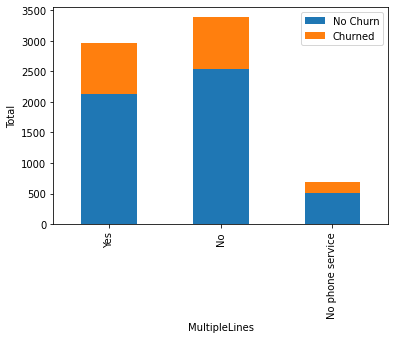

In [ ]:
data_vis1 = data.loc[(data['MultipleLines'] == 'Yes')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Yes'})

data_vis2 = data.loc[(data['MultipleLines'] == 'No')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'No'})

data_vis3 = data.loc[(data['MultipleLines'] == 'No phone service')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No phone service'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'MultipleLines', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='MultipleLines', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Internet Service Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','InternetService']], 
values=None, index = ['Churn'], columns='InternetService',aggfunc=len)
df_pivot1

customerID                  
InternetService        DSL Fiber optic    No
Churn                                       
No                    1962        1799  1413
Yes                    459        1297   113

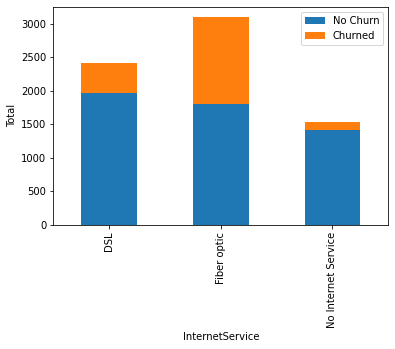

In [ ]:
data_vis1 = data.loc[(data['InternetService'] == 'DSL')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'DSL'})

data_vis2 = data.loc[(data['InternetService'] == 'Fiber optic')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'Fiber optic'})

data_vis3 = data.loc[(data['InternetService'] == 'No')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'No Internet Service'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'InternetService', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='InternetService', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Contract Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','Contract']], 
values=None, index = ['Churn'], columns='Contract',aggfunc=len)
df_pivot1

customerID                  
Contract Month-to-month One year Two year
Churn                                    
No                 2220     1307     1647
Yes                1655      166       48

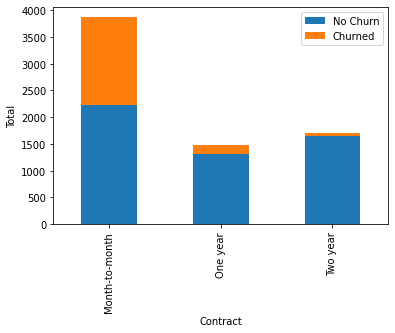

In [ ]:
data_vis1 = data.loc[(data['Contract'] == 'Month-to-month')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Month-to-month'})

data_vis2 = data.loc[(data['Contract'] == 'One year')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'One year'})

data_vis3 = data.loc[(data['Contract'] == 'Two year')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'Two year'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df2 = joined_df2.reset_index()
joined_df2 = joined_df2.rename(columns = {'index':'Churn'})

trans = joined_df2.T.reset_index()
trans = trans.rename(columns = {'index':'Contract', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='Contract', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of PaymentMethod Column

In [ ]:
df_pivot1 = pd.pivot_table(data[['customerID','Churn','PaymentMethod']], 
values=None, index = ['Churn'], columns='PaymentMethod',aggfunc=len)
df_pivot1

customerID  ...             
PaymentMethod Bank transfer (automatic)  ... Mailed check
Churn                                    ...             
No                                 1286  ...         1304
Yes                                 258  ...          308

[2 rows x 4 columns]

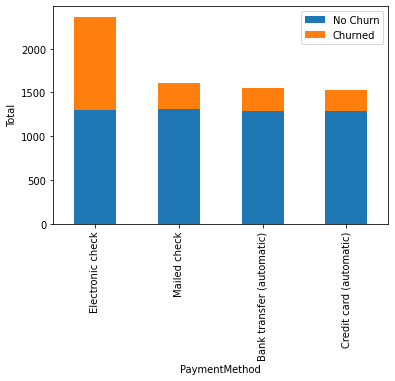

In [ ]:
data_vis1 = data.loc[(data['PaymentMethod'] == 'Electronic check')]
df_data_vis1 = pd.DataFrame(data_vis1['Churn'].value_counts(normalize = False))
df_data_vis1 = df_data_vis1.rename(columns={'Churn':'Electronic check'})

data_vis2 = data.loc[(data['PaymentMethod'] == 'Mailed check')]
df_data_vis2 = pd.DataFrame(data_vis2['Churn'].value_counts(normalize = False))
df_data_vis2 = df_data_vis2.rename(columns={'Churn':'Mailed check'})

data_vis3 = data.loc[(data['PaymentMethod'] == 'Bank transfer (automatic)')]
df_data_vis3 = pd.DataFrame(data_vis3['Churn'].value_counts(normalize = False))
df_data_vis3 = df_data_vis3.rename(columns={'Churn':'Bank transfer (automatic)'})

data_vis4 = data.loc[(data['PaymentMethod'] == 'Credit card (automatic)')]
df_data_vis4 = pd.DataFrame(data_vis4['Churn'].value_counts(normalize = False))
df_data_vis4 = df_data_vis4.rename(columns={'Churn':'Credit card (automatic)'})

joined_df = df_data_vis1.join(df_data_vis2, lsuffix='_')
joined_df2 = joined_df.join(df_data_vis3, lsuffix = '_')
joined_df3 = joined_df2.join(df_data_vis4, lsuffix = '_')
joined_df3 = joined_df3.reset_index()
joined_df3 = joined_df3.rename(columns = {'index':'Churn'})

trans = joined_df3.T.reset_index()
trans = trans.rename(columns = {'index':'PaymentMethod', 0:'No Churn', 1:'Churned'})
trans = trans.drop(index = 0, axis = 0)

trans.plot(x='PaymentMethod', kind='bar', stacked=True, ylabel = 'Total')

##Analysis of Tenure Column

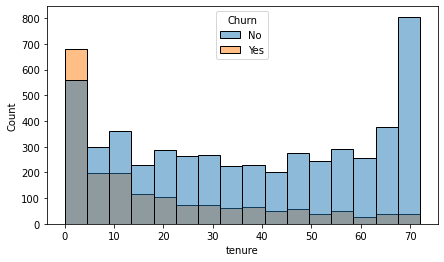

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='tenure', hue = 'Churn' )
plt.show()

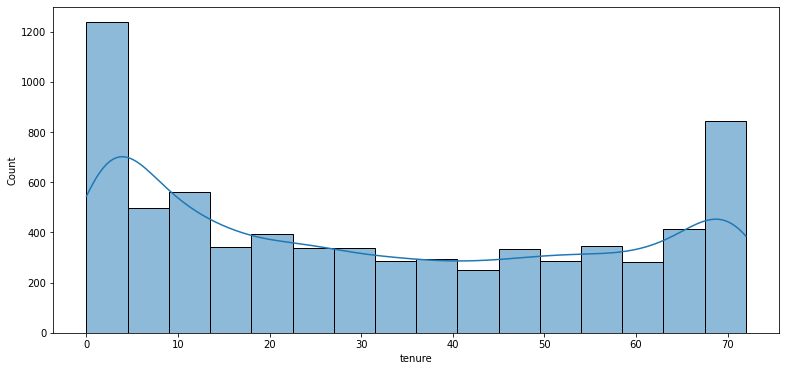

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(13,6))
sns.histplot(data=data, x='tenure', kde=True)
plt.show()

##Analysis of MonthlyCharges Column

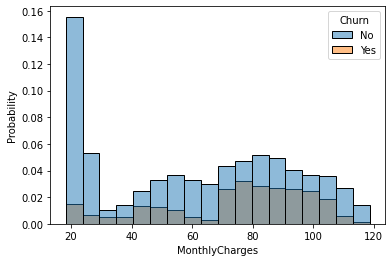

In [ ]:
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', stat='probability')
plt.show()

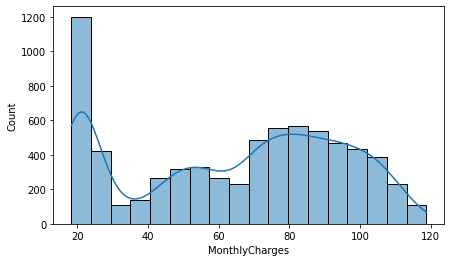

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='MonthlyCharges', kde=True, )
plt.show()

In [ ]:
#Skewness Coeficient
from scipy.stats import skew
print('koefisien Skewness MonthlyCharges :',skew(data['MonthlyCharges']))

#Penjelasan : Berdasarkan perhitungan diatas, dapat disimpulkan bahwa data MonthlyCharges memiliki distribusi yang negatively skewed atau left skewness karena koefisien bernilai negatif. Artinya data MonthlyCharges sedikit condong ke kiri . Adapun karena nilai koefisien berada pada rentang -0,5 dan 0,5 maka data ini termasuk fairly symmetrical (hampir simetris)

koefisien Skewness MonthlyCharges : -0.2204774644391769


##Analysis of Total Charges Column

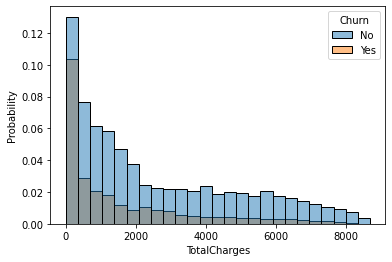

In [ ]:
sns.histplot(data=data, x='TotalCharges', hue='Churn', stat='probability')
plt.show()

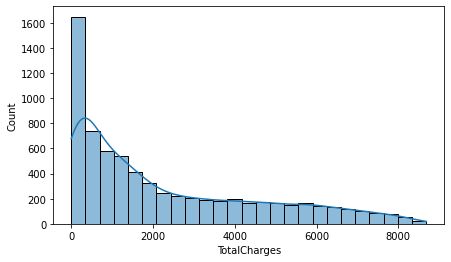

In [ ]:
#Analysis of distribution and skewness
plt.figure(figsize=(7,4))
sns.histplot(data=data, x='TotalCharges', kde=True, )
plt.show()

In [ ]:
#Menentukan nilai koefisien skewness 
from scipy.stats import skew
print('koefisien Skewness TotalCharges :',skew(data['TotalCharges']))

#Penjelasan : Berdasarkan perhitungan diatas, dapat disimpulkan bahwa data TotalCharges memiliki distribusi yang positively skewed atau right skewness karena koefisien bernilai positif. Artinya data TotalCharges sedikit condong ke kanan . Adapun karena nilai koefisien berada pada rentang 0,5 dan 1 maka data ini termasuk moderately skewed (Agak miring)

koefisien Skewness TotalCharges : 0.9630294954586066


##Correlation

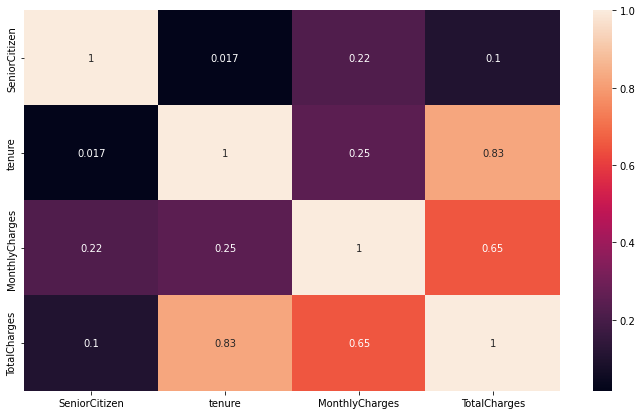

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

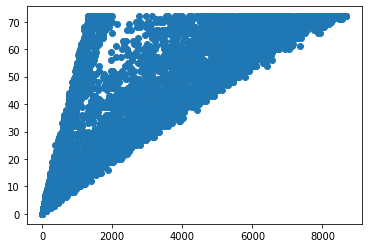

In [ ]:
plt.scatter(x=data['TotalCharges'], y=data['tenure'], marker='o')

#**Data Preprocessing**

##Check on Missing Values

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##LabelEncoder for each Categorical Attributes 

In [11]:
from sklearn.preprocessing import LabelEncoder

data_x = data.drop(['customerID','Churn'],axis=1)
data_y = data['Churn']

nums = data_x.select_dtypes(include=['int64', 'float64']).columns
cats = data_x.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for i in cats:
  data_x[i] = le.fit_transform(data_x[i])

data_y= le.fit_transform(data_y)

In [3]:
data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [4]:
data_y

array([0, 0, 1, ..., 0, 1, 0])

##Min Max Scaler

### Tenure Column

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

t = np.array(data_x['tenure']).reshape(-1,1)
scaler.fit(t)

data_x['tenure'] = scaler.transform(t)
data_x.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


###Monthly Charges Column

In [13]:
m = np.array(data_x['MonthlyCharges']).reshape(-1,1)
scaler.fit(m)

data_x['MonthlyCharges'] = scaler.transform(m)
data_x.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,29.85
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,1889.50
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,108.15
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,1840.75
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,151.65


###Total Charges Column

In [14]:
y = np.array(data_x['TotalCharges']).reshape(-1,1)
scaler.fit(y)

data_x['TotalCharges'] = scaler.transform(y)
data_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


#**Modelling**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from collections import Counter
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.25, random_state = 0)
sm = SMOTE(random_state=43, sampling_strategy=0.5)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

##Logistic Regression

In [15]:
#Using Default Parameter
lr = LogisticRegression(random_state = 40)
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))


Akurasi :  0.7955706984667802
Confusion Matrix  
 [[1156  142]
 [ 218  245]]
Recall :  0.5291576673866091
Precision :  0.6330749354005168


In [16]:
#After using SMOTE
lr = LogisticRegression(random_state = 40)
lr.fit(x_train_sm, y_train_sm)
prediction = lr.predict(x_test)

print("Accuracy score (training): ",lr.score(x_train_sm, y_train_sm))
print("Accuracy score (validation): ",lr.score(x_test, y_test))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

print("Before over sampling: {}".format(Counter(y_train)))
print("After over sampling: {}".format(Counter(y_train_sm)))

Accuracy score (training):  0.7844857241142071
Accuracy score (validation):  0.7887563884156729
Confusion Matrix  
 [[1097  201]
 [ 171  292]]
Recall :  0.6306695464362851
Precision :  0.592292089249493
Before over sampling: Counter({0: 3876, 1: 1406})
After over sampling: Counter({0: 3876, 1: 1938})


In [ ]:
#Change the parameter
lr = LogisticRegression(random_state = 40, max_iter = 5000)
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

print("Accuracy score (training): ",lr.score(x_train, y_train))
print("Accuracy score (validation): ",lr.score(x_test, y_test))
print()
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.8057553956834532
Accuracy score (validation):  0.7955706984667802

Confusion Matrix  
 [[1156  142]
 [ 218  245]]
Recall :  0.5291576673866091
Precision :  0.6330749354005168


##Decison Tree

In [ ]:
#Using Default Parameter
dt = DecisionTreeClassifier(random_state = 40, max_depth = 6)
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7762634866553095
Confusion Matrix  
 [[1151  147]
 [ 247  216]]
Recall :  0.46652267818574517
Precision :  0.5950413223140496


In [ ]:
#After Using SMOTE
dt = DecisionTreeClassifier(random_state = 40, max_depth = 6)
dt.fit(x_train_sm, y_train_sm)
prediction = dt.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7455990914253265
Confusion Matrix  
 [[1004  294]
 [ 154  309]]
Recall :  0.6673866090712743
Precision :  0.5124378109452736


##KNN

In [ ]:
#Using Default Parameter
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7421919363997729
Confusion Matrix  
 [[1087  211]
 [ 243  220]]
Recall :  0.47516198704103674
Precision :  0.5104408352668214


In [ ]:
#After Using SMOTE
knn = KNeighborsClassifier()
knn.fit(x_train_sm, y_train_sm)
prediction = knn.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7296990346394094
Confusion Matrix  
 [[1037  261]
 [ 215  248]]
Recall :  0.5356371490280778
Precision :  0.48722986247544203


##SVM

In [ ]:
#Using Default parameter
sv = svm.SVC()
sv.fit(x_train, y_train)
prediction = sv.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7819420783645656
Confusion Matrix  
 [[1175  123]
 [ 261  202]]
Recall :  0.43628509719222464
Precision :  0.6215384615384615


In [ ]:
#After using SMOTE
sv = svm.SVC()
sv.fit(x_train_sm, y_train_sm)
prediction = sv.predict(x_test)

print("Accuracy score (training): ",lr.score(x_train_sm, y_train_sm))
print("Accuracy score (validation): ",lr.score(x_test, y_test))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.7844857241142071
Accuracy score (validation):  0.7887563884156729
Confusion Matrix  
 [[1098  200]
 [ 204  259]]
Recall :  0.5593952483801296
Precision :  0.5642701525054467


In [ ]:
#Change the parameter
sv = svm.SVC(kernel = 'linear')
sv.fit(x_train, y_train)
prediction = sv.predict(x_test)

print("Accuracy score (training): ",lr.score(x_train, y_train))
print("Accuracy score (validation): ",lr.score(x_test, y_test))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.8057553956834532
Accuracy score (validation):  0.7955706984667802
Akurasi :  0.7950028392958546
Confusion Matrix  
 [[1162  136]
 [ 225  238]]
Recall :  0.5140388768898488
Precision :  0.6363636363636364


##Naive Bayes

In [ ]:
#Using Default Parameter
gnb = GaussianNB()
gnb.fit(x_train, y_train)
prediction = gnb.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.747870528109029
Confusion Matrix  
 [[984 314]
 [130 333]]
Recall :  0.7192224622030238
Precision :  0.5146831530139103


In [ ]:
#After Using SMOTE
gnb = GaussianNB()
gnb.fit(x_train_sm, y_train_sm)
prediction = gnb.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7421919363997729
Confusion Matrix  
 [[968 330]
 [124 339]]
Recall :  0.7321814254859611
Precision :  0.5067264573991032


##Gradient Boosting

In [ ]:
#Using default parameter
gb_clf = GradientBoostingClassifier(random_state=40)
gb_clf.fit(x_train, y_train)
prediction = gb_clf.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.794434980124929
Confusion Matrix  
 [[1159  139]
 [ 223  240]]
Recall :  0.5183585313174947
Precision :  0.633245382585752


In [ ]:
#After Using SMOTE
gb_clf = GradientBoostingClassifier(random_state=40)
gb_clf.fit(x_train_sm, y_train_sm)
prediction = gb_clf.predict(x_test)

print("Accuracy score (training):  {:.3f}".format(gb_clf.score(x_train_sm, y_train_sm)))
print("Accuracy score (validation): {:.3f}".format(gb_clf.score(x_test, y_test)))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.819
Accuracy score (validation): 0.786
Confusion Matrix  
 [[1108  190]
 [ 187  276]]
Recall :  0.5961123110151187
Precision :  0.592274678111588


In [ ]:
#Find the best parameter using Gridsearchcv
n_est = list([300, 500, 1000])
lr_list = list([0.05, 0.075, 0.75, 1])
max_dep = list([1,3,7])

param_grid = dict(n_estimators = n_est, learning_rate = lr_list, max_depth = max_dep)

grid = GridSearchCV(gb_clf, param_grid, cv = 10, scoring = 'accuracy', return_train_score=False)
grid.fit(x_train, y_train)

print("Best Score : ", grid.best_score_)
print("Best param : ", grid.best_params_)

Best Score :  0.8089681073494873
Best param :  {'learning_rate': 0.75, 'max_depth': 1, 'n_estimators': 300}


In [ ]:
#Using parameter from Gridsearch result
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.75, max_features='sqrt',
                                       max_depth=1, random_state=43)
gb_clf.fit(x_train, y_train)
prediction = gb_clf.predict(x_test)

print("Accuracy score (training):  {:.3f}".format(gb_clf.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(gb_clf.score(x_test, y_test)))
print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.820
Accuracy score (validation): 0.800
Akurasi :  0.8001135718341851
Confusion Matrix  
 [[1156  142]
 [ 210  253]]
Recall :  0.5464362850971922
Precision :  0.640506329113924


##Random Forest

In [ ]:
#Using default parameter
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)

print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Akurasi :  0.7876206700738216
Confusion Matrix  
 [[1164  134]
 [ 240  223]]
Recall :  0.4816414686825054
Precision :  0.6246498599439776


In [ ]:
#After Using SMOTE
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_sm, y_train_sm)
prediction = rf.predict(x_test)
print("Accuracy score (training):  {:.3f}".format(rf.score(x_train_sm, y_train_sm)))
print("Accuracy score (validation): {:.3f}".format(rf.score(x_test, y_test)))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.998
Accuracy score (validation): 0.780
Confusion Matrix  
 [[1120  178]
 [ 210  253]]
Recall :  0.5464362850971922
Precision :  0.5870069605568445


In [ ]:
#Find the best parameter using Gridsearchcv
n_tree = list([200,500,1000, 2000])
crit = list(["entropy","gini"])
max_d = list([1,3,8,10])

param_grid = dict(n_estimators = n_tree, criterion = crit, max_depth = max_d)

grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.8057491264249297
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 2000}


In [ ]:
#Using parameter from Gridsearch result
rf = RandomForestClassifier(n_estimators = 2000, max_depth=10, criterion = 'gini', random_state=0)
rf.fit(x_train_sm, y_train_sm)
prediction = rf.predict(x_test)

print("Accuracy score (training):  {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy score (validation): {:.3f}".format(rf.score(x_test, y_test)))

print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.893
Accuracy score (validation): 0.791
Confusion Matrix  
 [[1108  190]
 [ 178  285]]
Recall :  0.6155507559395248
Precision :  0.6


In [ ]:
#Another option for parameter with good accuracy 

rf = RandomForestClassifier(n_estimators = 200, max_depth=8, criterion = 'gini', random_state=0)
rf.fit(x_train_sm, y_train_sm)
prediction = rf.predict(x_test)

print("Accuracy score (training):  {:.3f}".format(rf.score(x_train_sm, y_train_sm)))
print("Accuracy score (validation): {:.3f}".format(rf.score(x_test, y_test)))
print('Akurasi : ', accuracy_score(y_test, prediction))
print('Confusion Matrix  \n', confusion_matrix(y_test, prediction))
print('Recall : ', recall_score(y_test, prediction))
print('Precision : ',precision_score(y_test, prediction))

Accuracy score (training):  0.839
Accuracy score (validation): 0.793
Akurasi :  0.7927314026121521
Confusion Matrix  
 [[1116  182]
 [ 183  280]]
Recall :  0.6047516198704104
Precision :  0.6060606060606061


##Dimesionality Reduction

###Filter Method

Before feature selection (5282, 19)
After feature selection (5282, 13)


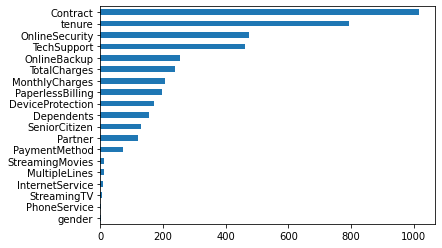

In [ ]:
filter = SelectKBest(f_classif, k=13)
filter.fit(x_train, y_train)

x_train_filter = filter.transform(x_train)
x_test_filter = filter.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_filter.shape)

feature_importance = pd.Series(filter.scores_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
#Using Logistic Regression
lr.fit(x_train_filter, y_train)

y_predict_train = lr.predict(x_train_filter)
y_predict_test = lr.predict(x_test_filter)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8023475956077244
Testing Accuracy: 0.7921635434412265
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.52      0.57       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.79      1761



In [ ]:
#Using Gradient Boosting
gb_clf.fit(x_train_filter, y_train)


y_predict_train = gb_clf.predict(x_train_filter)
y_predict_test = gb_clf.predict(x_test_filter)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8156001514577812
Testing Accuracy: 0.7989778534923339
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1298
           1       0.64      0.54      0.59       463

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [ ]:
#Using Random Forest
rf.fit(x_train_filter, y_train)


y_predict_train = rf.predict(x_train_filter)
y_predict_test = rf.predict(x_test_filter)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8419159409314654
Testing Accuracy: 0.7967064168086314
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1298
           1       0.65      0.49      0.56       463

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.80      0.79      1761



###Wrapper

Before feature selection (5282, 19)
After feature selection (5282, 14)



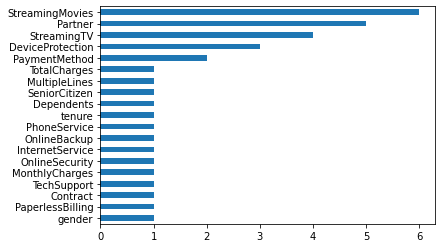

In [ ]:
#Using Logistic Regression
wrapper = RFE(lr, n_features_to_select=14)
wrapper.fit(x_train, y_train)

x_train_wrapper = wrapper.transform(x_train)
x_test_wrapper = wrapper.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_wrapper.shape)
print()
feature_importance = pd.Series(wrapper.ranking_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
lr.fit(x_train_wrapper, y_train)

y_predict_train = lr.predict(x_train_wrapper)
y_predict_test = lr.predict(x_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8076486179477471
Testing Accuracy: 0.794434980124929
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.53      0.58       463

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.79      0.79      1761



Before feature selection (5282, 19)
After feature selection (5282, 14)



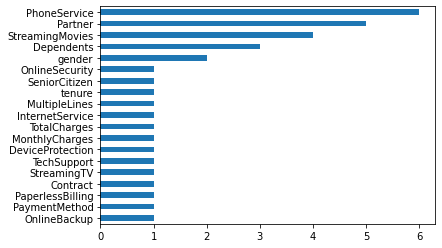

In [ ]:
#Using Random Forest
wrapper = RFE(rf, n_features_to_select=14)
wrapper.fit(x_train, y_train)

x_train_wrapper = wrapper.transform(x_train)
x_test_wrapper = wrapper.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_wrapper.shape)
print()
feature_importance = pd.Series(wrapper.ranking_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
rf.fit(x_train_wrapper, y_train)

y_predict_train = rf.predict(x_train_wrapper)
y_predict_test = rf.predict(x_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8388867853085953
Testing Accuracy: 0.7955706984667802
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1298
           1       0.65      0.49      0.56       463

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.80      0.79      1761



Before feature selection (5282, 19)
After feature selection (5282, 14)



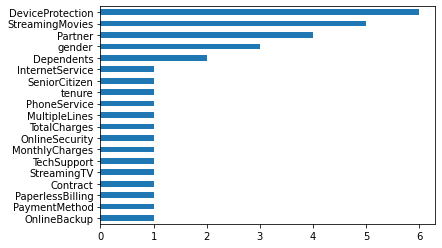

In [ ]:
#Using Gradient Boosting
wrapper = RFE(gb_clf, n_features_to_select=14)
wrapper.fit(x_train, y_train)

x_train_wrapper = wrapper.transform(x_train)
x_test_wrapper = wrapper.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_wrapper.shape)
print()
feature_importance = pd.Series(wrapper.ranking_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
gb_clf.fit(x_train_wrapper, y_train)

# Evaluation
y_predict_train = gb_clf.predict(x_train_wrapper)
y_predict_test = gb_clf.predict(x_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8209011737978038
Testing Accuracy: 0.7989778534923339
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1298
           1       0.64      0.54      0.59       463

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



Before feature selection (5282, 19)
After feature selection (5282, 14)



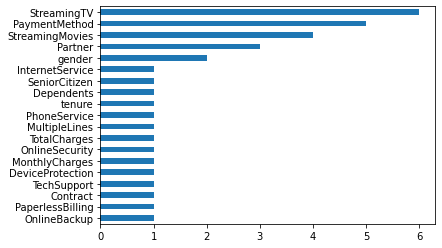

In [ ]:
#Using SVM
wrapper = RFE(sv, n_features_to_select=14)
wrapper.fit(x_train, y_train)

x_train_wrapper = wrapper.transform(x_train)
x_test_wrapper = wrapper.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_wrapper.shape)
print()
feature_importance = pd.Series(wrapper.ranking_, index=x_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

In [ ]:
sv.fit(x_train_wrapper, y_train)

# Evaluation
y_predict_train = sv.predict(x_train_wrapper)
y_predict_test = sv.predict(x_test_wrapper)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.799697084437713
Testing Accuracy: 0.7955706984667802
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1298
           1       0.63      0.52      0.57       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



###Embedded Method

In [ ]:
#Using Gradient Boosting
gb_clf_embed = SelectFromModel(gb_clf)

gb_clf_embed.fit(x_train,y_train)

x_train_new = gb_clf_embed.transform(x_train)
x_test_new = gb_clf_embed.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_new.shape)
print()



Before feature selection (5282, 19)
After feature selection (5282, 3)



In [ ]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.75, max_features='sqrt',
                                       max_depth=1, random_state=43)
model.fit(x_train_new, y_train)

y_predict_train = model.predict(x_train_new)
y_predict_test = model.predict(x_test_new)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.7828474062854979
Testing Accuracy: 0.7717206132879046
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1298
           1       0.59      0.43      0.50       463

    accuracy                           0.77      1761
   macro avg       0.70      0.66      0.67      1761
weighted avg       0.76      0.77      0.76      1761



In [ ]:
#Using Random Forest
rf_embed = SelectFromModel(rf)

rf_embed.fit(x_train,y_train)

x_train_new = rf_embed.transform(x_train)
x_test_new = rf_embed.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_new.shape)
print()

Before feature selection (5282, 19)
After feature selection (5282, 6)



In [ ]:
model2 = RandomForestClassifier(n_estimators = 200, max_depth=8, criterion = 'gini', random_state=0)

model2.fit(x_train_new, y_train)

y_predict_train = model2.predict(x_train_new)
y_predict_test = model2.predict(x_test_new)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8396440742143128
Testing Accuracy: 0.7932992617830777
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1298
           1       0.64      0.50      0.56       463

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [ ]:
#Using SVM
sv_embed = SelectFromModel(sv)

sv_embed.fit(x_train,y_train)

x_train_new = sv_embed.transform(x_train)
x_test_new = sv_embed.transform(x_test)

print("Before feature selection", x_train.shape)
print("After feature selection", x_train_new.shape)
print()

Before feature selection (5282, 19)
After feature selection (5282, 5)



In [ ]:
model3 = svm.SVC(kernel = 'linear')

model3.fit(x_train_new, y_train)

y_predict_train = model3.predict(x_train_new)
y_predict_test = model3.predict(x_test_new)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.7898523286633851
Testing Accuracy: 0.7728563316297559
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1298
           1       0.59      0.45      0.51       463

    accuracy                           0.77      1761
   macro avg       0.70      0.67      0.68      1761
weighted avg       0.76      0.77      0.76      1761

